# 导入数据集

http://vis-www.cs.umass.edu/lfw/index.html
整个有10000张图片，5700个人，1700人有两张或以上的照片

In [34]:
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
import numpy as np
from sklearn.metrics import classification_report,confusion_matrix
import os
os.chdir(r'D:\CDA\File')

In [4]:
lfw_people = fetch_lfw_people(data_home='D:\CDA\File')

In [6]:
fetch_lfw_people?

# 查看数据集

In [7]:
lfw_people.data.shape#13233张图片，2914个特征  62*47    

(13233, 2914)

In [8]:
lfw_people.target #标签

array([5360, 3434, 3807, ..., 2175,  373, 2941], dtype=int64)

In [11]:
lfw_people.data[0]  #第0张图片

array([34.      , 29.333334, 22.333334, ..., 14.666667, 16.      ,
       14.      ], dtype=float32)

In [7]:
n_samples, h, w = lfw_people.images.shape
print(n_samples)  #样本数量
print(h)#高的像素
print(w)#宽度像素

13233
62
47


In [10]:
lfw_people.images[0].shape

(62, 47)

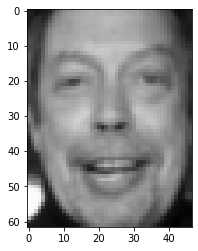

In [11]:
plt.imshow(lfw_people.images[0],cmap='gray')
plt.show()

In [13]:
lfw_people.target[0]  #第0张图片所对应的标签

5360

In [12]:
lfw_people.target_names[5360]  #标签所对应的名字

'Tim Curry'

In [14]:
lfw_people.target_names.shape[0]#有多少个人

5749

# 选择有多个图片的人物进行SVM训练

In [23]:
lfw_people = fetch_lfw_people(data_home='D:\CDA\File',min_faces_per_person=50)

In [24]:
lfw_people.data.shape#1560张图片，2914个特征

(1560, 2914)

In [25]:
lfw_people.target_names

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Hugo Chavez', 'Jacques Chirac',
       'Jean Chretien', 'John Ashcroft', 'Junichiro Koizumi',
       'Serena Williams', 'Tony Blair'], dtype='<U17')

In [26]:
import pandas as pd 
pd.DataFrame(lfw_people.target)[0].value_counts()

3     530
1     236
11    144
2     121
4     109
0      77
5      71
9      60
7      55
8      53
10     52
6      52
Name: 0, dtype: int64

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(lfw_people.data, lfw_people.target,stratify=lfw_people.target)

In [29]:
# 'linear', 'poly', 'rbf', 'sigmoid'
model = svm.SVC(kernel='poly')
model.fit(x_train, y_train)

D:\conda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='poly', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [30]:
model.score(x_train, y_train) #训练集上的得分

1.0

In [26]:
model.score(x_test,y_test)

0.7717948717948718

## 参数优化

In [ ]:
from sklearn.model_selection import GridSearchCV
params={'C':[0.01,0.1,1,10,100],'degree':[2],'gamma':np.linspace(0.1,2,5),'coef0':np.linspace(0.1,2,5)}
model = svm.SVC(kernel='poly')
grid_search=GridSearchCV(model,param_grid=params,cv=10,verbose=2,n_jobs=-1)
grid_search.fit(x_train,y_train)
grid_search.best_params_

In [132]:
grid_search.score(x_test,y_test)

0.7923076923076923

In [82]:
predictions = grid_search.predict(x_test)

In [83]:
target_names=lfw_people.target_names

In [39]:
confusion_matrix?

In [84]:
n_classes = lfw_people.target_names.shape[0]
print(confusion_matrix(y_test,predictions,labels= range(n_classes)))  #混淆矩阵

[[ 15   3   4   0   1   0   0   0   0   0   0   0]
 [  0  50   1   5   0   1   1   0   0   0   1   1]
 [  2   0  27   4   1   0   0   1   0   0   0   0]
 [  0   2   6 114   1   0   0   0   2   0   3   5]
 [  0   1   0   3  17   1   1   0   0   0   0   2]
 [  0   0   0   2   0  12   0   0   0   1   0   1]
 [  0   0   0   2   0   0   9   1   0   0   0   1]
 [  0   0   0   0   1   0   0  14   0   0   0   0]
 [  0   0   1   0   1   0   0   0   8   0   0   1]
 [  0   0   0   0   1   1   0   0   0  11   0   0]
 [  1   0   0   1   0   0   0   0   0   0  13   0]
 [  0   2   1   0   1   1   1   0   0   0   0  25]]


In [147]:
print(classification_report(y_test,predictions,target_names=target_names)) #分类报告

                   precision    recall  f1-score   support

     Ariel Sharon       0.00      0.00      0.00        15
     Colin Powell       0.25      0.19      0.21        86
  Donald Rumsfeld       0.14      0.09      0.11        34
    George W Bush       0.35      0.34      0.34       140
Gerhard Schroeder       0.00      0.00      0.00        19
      Hugo Chavez       0.06      0.06      0.06        16
   Jacques Chirac       0.00      0.00      0.00         9
    Jean Chretien       0.00      0.00      0.00         8
    John Ashcroft       0.00      0.00      0.00        10
Junichiro Koizumi       0.00      0.00      0.00        11
  Serena Williams       0.00      0.00      0.00        11
       Tony Blair       0.09      0.10      0.09        31

         accuracy                           0.18       390
        macro avg       0.07      0.06      0.07       390
     weighted avg       0.20      0.18      0.19       390



# PCA降维

## 特征脸

In [42]:
x_train.shape

(1170, 2914)

In [43]:
from sklearn.decomposition import PCA
# 100维度
n_components = 100
pca = PCA(n_components=n_components).fit(x_train)

In [44]:
pca.components_.shape #主成分

(100, 2914)

In [45]:
n_samples, h, w = lfw_people.images.shape
eigenfaces = pca.components_.reshape((n_components, h, w))#特征脸

In [46]:
eigenfaces.shape

(100, 62, 47)

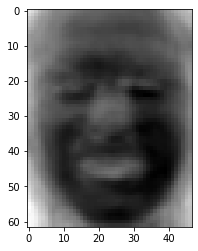

In [47]:
#画特征脸
plt.imshow(eigenfaces[0], cmap=plt.cm.gray)

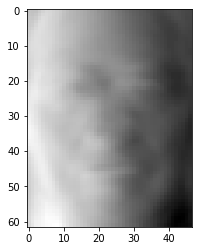

In [92]:
plt.imshow(eigenfaces[1], cmap=plt.cm.gray)

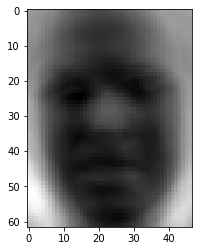

In [36]:
plt.imshow(eigenfaces[2], cmap=plt.cm.gray)

## 降维处理

In [37]:
# 特征提取
pca = PCA(n_components=n_components) #100维
x_train_pca=pca.fit_transform(x_train)  #对训练集
x_train_pca.shape

(1170, 100)

In [38]:
x_test_pca = pca.transform(x_test)  #对测试集

In [39]:
x_train_pca.shape

(1170, 100)

In [40]:
x_test_pca.shape

(390, 100)

## 训练模型

In [41]:
# 'linear', 'poly', 'rbf', 'sigmoid'
model = svm.SVC(kernel='poly')
model.fit(x_train_pca, y_train)

D:\conda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='poly', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

## 预测

In [42]:
model.score(x_test_pca,y_test)

0.617948717948718

In [45]:
target_names

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Hugo Chavez', 'Jacques Chirac',
       'Jean Chretien', 'John Ashcroft', 'Junichiro Koizumi',
       'Serena Williams', 'Tony Blair'], dtype='<U17')

In [47]:
n_classes = lfw_people.target_names.shape[0]
predictions = model.predict(x_test_pca)
print(confusion_matrix(predictions, y_test, labels= range(n_classes)))

[[  7   1   1   1   0   0   1   0   1   0   0   0]
 [  5  50   7   6   1   0   2   1   5   4   1   4]
 [  0   1   8   6   2   0   1   1   0   0   0   1]
 [  4   7   3 110   5   6   5   2   3   4   1   8]
 [  1   0   0   0   8   3   1   0   1   0   0   3]
 [  0   0   0   2   2   7   0   0   0   2   0   0]
 [  0   1   0   1   0   0   1   0   0   0   0   0]
 [  0   1   1   0   1   0   0   8   0   0   0   0]
 [  0   1   0   3   1   1   0   1   2   1   0   2]
 [  0   0   0   0   0   0   0   0   0  10   0   0]
 [  0   0   0   0   0   0   0   0   0   0  15   0]
 [  0   1   2   4   8   0   2   0   1   0   0  15]]


In [48]:
print(classification_report(predictions, y_test, target_names=target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.41      0.58      0.48        12
     Colin Powell       0.79      0.58      0.67        86
  Donald Rumsfeld       0.36      0.40      0.38        20
    George W Bush       0.83      0.70      0.76       158
Gerhard Schroeder       0.29      0.47      0.36        17
      Hugo Chavez       0.41      0.54      0.47        13
   Jacques Chirac       0.08      0.33      0.12         3
    Jean Chretien       0.62      0.73      0.67        11
    John Ashcroft       0.15      0.17      0.16        12
Junichiro Koizumi       0.48      1.00      0.65        10
  Serena Williams       0.88      1.00      0.94        15
       Tony Blair       0.45      0.45      0.45        33

         accuracy                           0.62       390
        macro avg       0.48      0.58      0.51       390
     weighted avg       0.67      0.62      0.64       390



## 画图

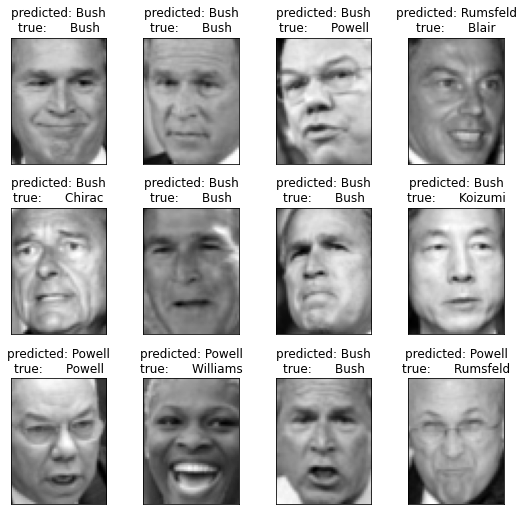

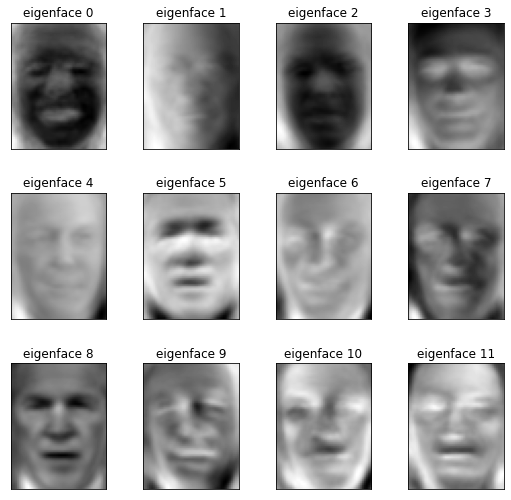

In [49]:
# 画图，3行4列
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

# 获取一张图片title
def title(predictions, y_test, target_names, i):
    pred_name = target_names[predictions[i]].split(' ')[-1]
    true_name = target_names[y_test[i]].split(' ')[-1]
    return 'predicted: %s\ntrue:      %s' % (pred_name, true_name)

# 获取所有图片title
prediction_titles = [title(predictions, y_test, target_names, i) for i in range(predictions.shape[0])]

# 画图
plot_gallery(x_test, prediction_titles, h, w)

# 设置特征脸的title
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]

# 画特征脸的图
plot_gallery(eigenfaces, eigenface_titles, h, w)

plt.show()